In [1]:
#Imports
import pandas as pd
from datetime import datetime, timedelta
import hvplot.pandas
import numpy as np
import yfinance as yf

In [2]:
# Define the stock symbol
stock_symbol_aapl = "AAPL"
stock_symbol_msft = "MSFT"
stock_symbol_goog = "GOOG"
stock_symbol_meta = "META"
stock_symbol_amzn = "AMZN"
index_symbol_ndx = "NDX"
index_symbol_tnx = "^TNX"
# Calculate the start and end dates for the past 10 years
end_date = datetime.today().date()
start_date = end_date - timedelta(days=10*365)  # 10 years * 365 days

# Fetch historical price data
stock_data_aapl = yf.download(stock_symbol_aapl, start=start_date, end=end_date)
stock_data_msft = yf.download(stock_symbol_msft, start=start_date, end=end_date)
stock_data_goog = yf.download(stock_symbol_goog, start=start_date, end=end_date)
stock_data_meta = yf.download(stock_symbol_meta, start=start_date, end=end_date)
stock_data_amzn = yf.download(stock_symbol_amzn, start=start_date, end=end_date)
index_data_ndx = yf.download(index_symbol_ndx, start=start_date, end=end_date)
index_data_tnx = yf.download(index_symbol_tnx, start=start_date, end=end_date)
# Print the retrieved data
stock_data_aapl = stock_data_aapl.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])
stock_data_msft = stock_data_msft.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])
stock_data_goog = stock_data_goog.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])
stock_data_meta = stock_data_meta.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])
stock_data_amzn = stock_data_amzn.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])
index_data_ndx = index_data_ndx.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])
index_data_tnx = index_data_tnx.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
all_data_df = pd.concat([stock_data_aapl, stock_data_msft, stock_data_goog, stock_data_meta, stock_data_amzn, index_data_ndx, index_data_tnx], axis="columns", join="inner")
columns = ["AAPL", "MSFT", "GOOG", "META", "AMZN", "NDX", "TNX"]
all_data_df.columns = columns
all_data_df

,AAPL,MSFT,GOOG,META,AMZN,NDX,TNX
Date,,,,,,,
2013-08-21,15.658398,26.470678,21.652094,38.320000,14.228500,3071.469971,2.855
2013-08-22,15.677101,27.123865,21.761185,38.549999,14.486500,3101.820068,2.901
2013-08-23,15.616629,29.100155,21.674009,40.549999,14.500500,3124.270020,2.818
2013-08-26,15.677418,28.597713,21.578867,41.340000,14.310500,3122.669922,2.805
2013-08-27,15.229192,27.852407,21.174383,39.639999,14.046500,3059.580078,2.721
...,...,...,...,...,...,...,...
2023-08-11,177.789993,320.331787,130.169998,301.640015,138.410004,15028.070312,4.168
2023-08-14,179.460007,323.355408,131.830002,306.190002,140.570007,15205.589844,4.184
2023-08-15,177.449997,321.179962,130.270004,301.950012,137.669998,15037.650391,4.221


In [4]:
daily_returns_all_data = all_data_df.pct_change()
daily_returns_all_data.dropna()

,AAPL,MSFT,GOOG,META,AMZN,NDX,TNX
Date,,,,,,,
2013-08-22,0.001194,0.024676,0.005038,0.006002,0.018133,0.009881,0.016112
2013-08-23,-0.003857,0.072862,-0.004006,0.051881,0.000966,0.007238,-0.028611
2013-08-26,0.003893,-0.017266,-0.004390,0.019482,-0.013103,-0.000512,-0.004613
2013-08-27,-0.028591,-0.026062,-0.018744,-0.041122,-0.018448,-0.020204,-0.029947
2013-08-28,0.004728,-0.007216,-0.001882,0.022957,0.002314,0.004115,0.022418
...,...,...,...,...,...,...,...
2023-08-11,0.000338,-0.005946,-0.000307,-0.013410,-0.001083,-0.006661,0.021569
2023-08-14,0.009393,0.009439,0.012753,0.015084,0.015606,0.011813,0.003839
2023-08-15,-0.011200,-0.006728,-0.011833,-0.013848,-0.020630,-0.011045,0.008843


In [5]:
# Plot daily returns of all portfolios
daily_returns_all_data.hvplot(
    x='Date'
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [6]:
# Calculate cumulative returns of all portfolios
cum_portfolio_data = (1 + daily_returns_all_data).cumprod(axis=0)
cum_portfolio_data
# Plot cumulative returns
cum_portfolio_data.hvplot(
    width=600,
    height=400
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [7]:
port_var = daily_returns_all_data.var()
port_var

AAPL    0.000323
MSFT    0.000295
GOOG    0.000310
META    0.000569
AMZN    0.000437
NDX     0.000186
TNX     0.000985
dtype: float64

In [8]:
df_std = pd.DataFrame(daily_returns_all_data.std()) * np.sqrt(252)
df_std

,0
AAPL,0.285236
MSFT,0.272540
GOOG,0.279477
META,0.378602
AMZN,0.331661
NDX,0.216372
TNX,0.498121


In [9]:
correlation_df = daily_returns_all_data.corr()
correlation_df

,AAPL,MSFT,GOOG,META,AMZN,NDX,TNX
AAPL,1.000000,0.653170,0.590656,0.517302,0.532575,0.809064,0.184496
MSFT,0.653170,1.000000,0.698525,0.550772,0.615247,0.850404,0.162635
GOOG,0.590656,0.698525,1.000000,0.632438,0.639133,0.800306,0.150006
META,0.517302,0.550772,0.632438,1.000000,0.571921,0.698868,0.111731
AMZN,0.532575,0.615247,0.639133,0.571921,1.000000,0.736121,0.077327
NDX,0.809064,0.850404,0.800306,0.698868,0.736121,1.000000,0.204789
TNX,0.184496,0.162635,0.150006,0.111731,0.077327,0.204789,1.000000


In [10]:
sharpe_ratio = ((daily_returns_all_data.mean()-daily_returns_all_data['TNX'].mean())*252)/(daily_returns_all_data.std() * np.sqrt(252))
sharpe_ratio

AAPL    0.419940
MSFT    0.453683
GOOG    0.202092
META    0.294215
AMZN    0.353596
NDX     0.083714
TNX     0.000000
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

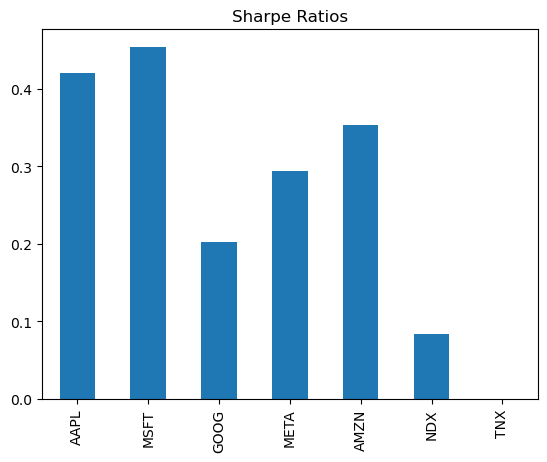

In [11]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind = "bar", title = "Sharpe Ratios")

In [12]:
import numpy as np
import matplotlib.pyplot as plt
#from pypfopt.expected_returns import mean_historical_return
from pypfopt import plotting
from pypfopt.risk_models import risk_matrix
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import objective_functions
import scipy.optimize as sco
from pypfopt import risk_models
#from pypfopt.efficient_frontier import EfficientFrontier
#ef = EfficientFrontier(mu, S)
#weights = ef.max_sharpe()

(CVXPY) Aug 19 01:19:26 AM: Encountered unexpected exception importing solver CVXOPT:
ImportError("dlopen(/Users/bpalmy/anaconda3/envs/dev/lib/python3.10/site-packages/cvxopt/base.cpython-310-darwin.so, 0x0002): Library not loaded: @rpath/liblapack.3.dylib\n  Referenced from: <825F20AD-4E2F-31FC-9288-650E1DDAA389> /Users/bpalmy/anaconda3/envs/dev/lib/python3.10/site-packages/cvxopt/base.cpython-310-darwin.so\n  Reason: tried: '/Users/bpalmy/anaconda3/envs/dev/lib/python3.10/site-packages/cvxopt/../../../liblapack.3.dylib' (no such file), '/Users/bpalmy/anaconda3/envs/dev/lib/python3.10/site-packages/cvxopt/../../../liblapack.3.dylib' (no such file), '/Users/bpalmy/anaconda3/envs/dev/bin/../lib/liblapack.3.dylib' (no such file), '/Users/bpalmy/anaconda3/envs/dev/bin/../lib/liblapack.3.dylib' (no such file), '/usr/local/lib/liblapack.3.dylib' (no such file), '/usr/lib/liblapack.3.dylib' (no such file, not in dyld cache)")
(CVXPY) Aug 19 01:19:26 AM: Encountered unexpected exception impor

In [13]:
stock_symbols = [ "AAPL", "MSFT", "GOOG", "META", "AMZN","NDX"] # Change this to the desired stock symbol
# Calculate the start and end dates for the past 10 years
end_date = datetime.today().date()
start_date = end_date - timedelta(days=10*365)  # 10 years * 365 days
portfolio_data= yf.download(stock_symbols, start=start_date, end=end_date)
#Drop Nulls. Remove high, low, open data. 
print(portfolio_data.isnull().sum())
portfolio_data = portfolio_data.drop(columns=['Open', 'High', 'Low', 'Volume', 'Close'])
portfolio_data.dropna()

[*********************100%%**********************]  6 of 6 completed
Adj Close  AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
           NDX     1
Close      AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
           NDX     1
High       AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
           NDX     1
Low        AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
           NDX     1
Open       AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
           NDX     1
Volume     AAPL    0
           AMZN    0
           GOOG    0
           META    0
           MSFT    0
           NDX     1
dtype: int64


Adj Close                                                  \
                  AAPL        AMZN        GOOG        META        MSFT   
Date                                                                     
2013-08-21   15.658403   14.228500   21.652094   38.320000   26.470680   
2013-08-22   15.677103   14.486500   21.761185   38.549999   27.123859   
2013-08-23   15.616636   14.500500   21.674009   40.549999   29.100157   
2013-08-26   15.677421   14.310500   21.578867   41.340000   28.597717   
2013-08-27   15.229192   14.046500   21.174383   39.639999   27.852413   
...                ...         ...         ...         ...         ...   
2023-08-11  177.789993  138.410004  130.169998  301.640015  320.331787   
2023-08-14  179.460007  140.570007  131.830002  306.190002  323.355408   
2023-08-15  177.449997  137.669998  130.270004  301.950012  321.179962   
2023-08-16  176.570007  135.070007  129.110001  294.290009  320.399994   
2023-08-17  174.000000  133.979996  130.460007  285.089996  316.880005   

                          
                     NDX  
Date                      
2013-08-21   3071.469971  
2013-08-22   3101.820068  
2013-08-23   3124.270020  
2013-08-26   3122.669922  
2013-08-27   3059.580078  
...                  ...  
2023-08-11  15028.070312  
2023-08-14  15205.589844  
2023-08-15  15037.650391  
2023-08-16  14876.469727  
2023-08-17  14715.809570  

[2515 rows x 6 columns]

In [14]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(portfolio_data)
mu

Adj Close  AAPL    0.272618
           AMZN    0.250826
           GOOG    0.194904
           META    0.220190
           MSFT    0.281671
           NDX     0.169982
dtype: float64

In [15]:
S = risk_models.sample_cov(portfolio_data)
S

Adj Close                                                  
                    AAPL      AMZN      GOOG      META      MSFT       NDX
Adj Close AAPL  0.081285  0.050352  0.047025  0.055804  0.050765  0.049907
          AMZN  0.050352  0.109861  0.059170  0.071713  0.055570  0.052773
          GOOG  0.047025  0.059170  0.078011  0.066830  0.053174  0.048353
          META  0.055804  0.071713  0.066830  0.143142  0.056792  0.057193
          MSFT  0.050765  0.055570  0.053174  0.056792  0.074223  0.050111
          NDX   0.049907  0.052773  0.048353  0.057193  0.050111  0.046781

In [16]:
# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
ef.portfolio_performance(verbose=True)

Expected annual return: 27.6%
Annual volatility: 25.1%
Sharpe Ratio: 1.02


(0.2764914932800228, 0.2511919777838342, 1.0210974711172869)

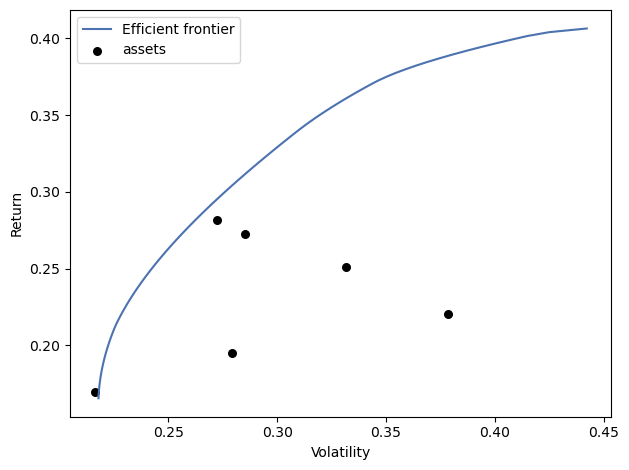

In [17]:
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_constraint(lambda w: w[0] >= 0.2)
ef.add_constraint(lambda w: w[2] == 0.15)
ef.add_constraint(lambda w: w[3] + w[4] <= 0.10)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

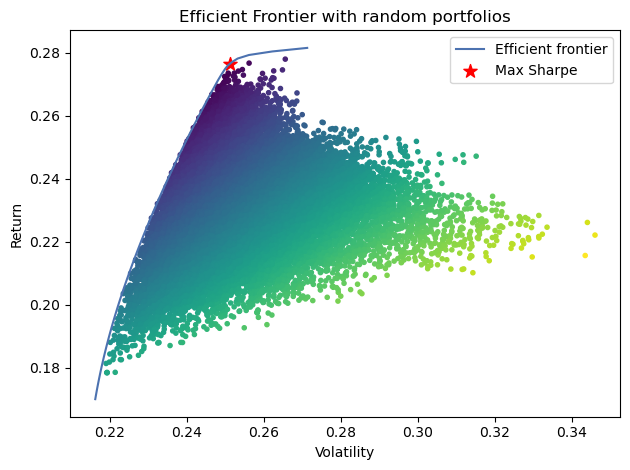

In [19]:
import copy 
ef = EfficientFrontier(mu, S)
# ef.add_objective(objective_functions.L2_reg, gamma=0.1)
fig, ax = plt.subplots()
ef_max_sharpe = ef.deepcopy()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 25000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [20]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage


# Calculate expected returns and covariance matrix
mu = mean_historical_return(portfolio_data)
S = CovarianceShrinkage(portfolio_data).ledoit_wolf()

# Create an EfficientFrontier instance
ef = EfficientFrontier(mu, S)

# Specify the target expected return
target_return = 30  # Replace with your desired target return

# Optimize for minimum risk for the given target return
weights_2 = ef.efficient_risk(target_return)

# Display the optimized portfolio weights
print(weights_2)

OrderedDict([(('Adj Close', 'AAPL'), 1.177225522e-07), (('Adj Close', 'AMZN'), 5.5660472e-09), (('Adj Close', 'GOOG'), 4.873522e-10), (('Adj Close', 'META'), 1.4473737e-09), (('Adj Close', 'MSFT'), 0.9999998743347503), (('Adj Close', 'NDX'), 4.417954e-10)])


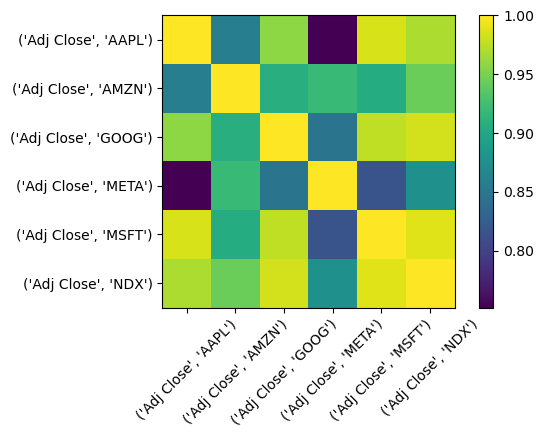

In [21]:
from pypfopt.plotting import plot_covariance
# Calculate covariance matrix S using df
S = portfolio_data.cov()

# Define tickers (labels) for the assets
tickers = portfolio_data.columns

# Plot the covariance matrix heatmap
plot_covariance(S, plot_correlation=True, show_tickers=True)

# Set custom tick labels
plt.xticks(np.arange(len(tickers)), tickers, rotation=45)
plt.yticks(np.arange(len(tickers)), tickers)

# Show the plot
plt.show()

In [22]:
from pypfopt.plotting import random_portfolios
# Calculate daily returns
returns = portfolio_data.pct_change().dropna()

# Calculate covariance matrix
covariance_matrix = returns.cov()

# Create an EfficientFrontier instance
ef = EfficientFrontier(mu, S)

# Generate 25,000 random portfolios
random_portfolios = ef.random_portfolios(num_portfolios=25000)

# Calculate metrics for each random portfolio
port_returns = [ef.portfolio_performance()[0] for ef in random_portfolios]
port_volatility = [ef.portfolio_performance()[1] for ef in random_portfolios]
sharpe_ratios = [ef.portfolio_performance()[2] for ef in random_portfolios]

# Find index of portfolio with maximum Sharpe ratio
max_sharpe_index = np.argmax(sharpe_ratios)

# Find index of portfolio with minimum volatility
min_volatility_index = np.argmin(port_volatility)

# Plot the efficient frontier
plot_efficient_frontier(ef, points=25000)

# Display allocations for max Sharpe ratio portfolio
print("Max Sharpe Ratio Portfolio Allocations:")
print(random_portfolios[max_sharpe_index].clean_weights())

# Display allocations for min volatility portfolio
print("Min Volatility Portfolio Allocations:")
print(random_portfolios[min_volatility_index].clean_weights())

# Show the plot
plt.show()

ImportError: cannot import name 'random_portfolios' from 'pypfopt.plotting' (/Users/bpalmy/anaconda3/envs/dev/lib/python3.10/site-packages/pypfopt/plotting.py)